Original DataFrame:
   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]
Updated DataFrame with new column names:
   ID   A

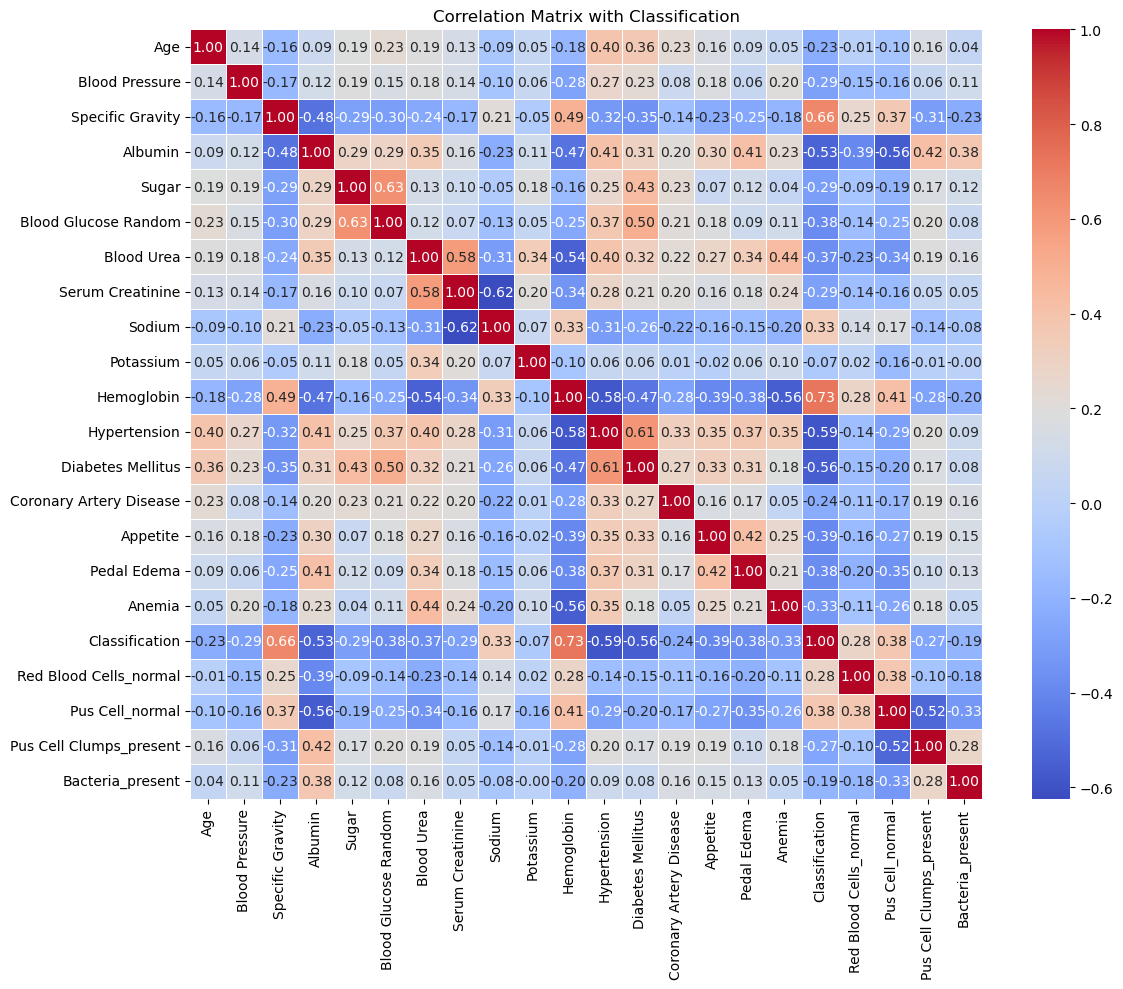

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# To Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load the dataset from the URL (or your local path)
file_path = "C:\\Users\\User\\ckd-data\\kidney_disease.csv"
CKD_Data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original DataFrame:")
print(CKD_Data.head())

# Step 1: Rename columns to make them more readable
CKD_Data.columns = [
    'ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 
    'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 
    'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 
    'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 
    'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 
    'Appetite', 'Pedal Edema', 'Anemia', 'Classification'
]

# Display the updated DataFrame
print("Updated DataFrame with new column names:")
print(CKD_Data.head())

# Step 2: Handle non-standard values (like '\t?' or others) with NaN replacement
CKD_Data.replace({'\t?': np.nan}, inplace=True)

# Step 3: Replace non-standard values in 'Classification' column
CKD_Data['Classification'] = CKD_Data['Classification'].str.replace('ckd\t', 'ckd', regex=False)

# Verify the unique values in the 'Classification' column after replacement
print("Unique values in 'Classification' after replacement:")
print(CKD_Data['Classification'].unique())

# Replace non-standard values in 'Diabetes Mellitus' and 'Coronary Artery Disease' columns
CKD_Data['Diabetes Mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
CKD_Data['Coronary Artery Disease'].replace(to_replace={'\tno': 'no'}, inplace=True)

# Verify the unique values in each column after replacement
print("Unique values in 'Diabetes Mellitus' after replacement:")
print(CKD_Data['Diabetes Mellitus'].unique())

print("Unique values in 'Coronary Artery Disease' after replacement:")
print(CKD_Data['Coronary Artery Disease'].unique())

# Step 4: Convert categorical columns to 'category' type
cat_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype == 'object']
for col in cat_cols:
    CKD_Data[col] = CKD_Data[col].astype('category')

# Step 5: Handle missing values for categorical columns (e.g., fill with mode)
for col in cat_cols:
    CKD_Data[col].fillna(CKD_Data[col].mode()[0], inplace=True)

# Handle missing values for numeric columns (e.g., fill with median)
num_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype in ['float64', 'int64']]
for col in num_cols:
    CKD_Data[col].fillna(CKD_Data[col].median(), inplace=True)

# Verify that all missing values are handled
print("\nMissing values after cleaning:")
print(CKD_Data.isnull().sum())

# Step 6: Encode categorical variables
# Label Encoding for binary categorical columns
binary_cols = ['Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
               'Appetite', 'Pedal Edema', 'Anemia', 'Classification']
le = LabelEncoder()
for col in binary_cols:
    CKD_Data[col] = le.fit_transform(CKD_Data[col])

# One-Hot Encoding for multi-class categorical columns
categorical_columns = ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria']
CKD_Data = pd.get_dummies(CKD_Data, columns=categorical_columns, drop_first=True)

# Step 7: Scaling the numerical features
scaler = StandardScaler()
num_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype in ['float64', 'int64']]
CKD_Data[num_cols] = scaler.fit_transform(CKD_Data[num_cols])

# Display the first few rows after encoding and scaling
print("\nData after Encoding and Scaling:")
print(CKD_Data.head())

# Step 8: Split data into training and testing sets (80% train, 20% test) 'Classification' is (target variable ) and 'ID' is (identifier)
X = CKD_Data.drop(columns=['Classification', 'ID'])  
y = CKD_Data['Classification']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# Step 9: Correlation Heatmap (excluding ID column but keeping it in the dataset)
# Calculate the correlation matrix
correlation_data = CKD_Data.drop(columns=['ID'])  
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix with Classification")
plt.tight_layout()
plt.show()


In [ ]:
## SMOTE for Handling Class Imbalance:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = CKD_Data.drop(columns=['Classification', 'ID'])  
y = CKD_Data['Classification']

# Train-test split (no SMOTE applied yet)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled, y_train_resampled will be the balanced data for training


## SMOTE for Handling Class Imbalance:

In [2]:
## Step 10: Model Training and Evaluation

# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),  
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Convert all columns to numeric type (this ensures no non-numeric values remain)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check if the conversion was successful
#print("\nData types after conversion:")
#print(X_train.dtypes)


# Train and evaluate each model again
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[52  0]
 [ 0 28]]

--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[52  0]
 [ 0 28]]

--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       

To visualize the results of models

Accuracy Bar Plot: Comparing the accuracy of each model.
Confusion Matrix Heatmap: Visualizing the confusion matrices for each model.
ROC Curve: Comparing the ROC curves of each model to evaluate their performance.
Precision-Recall Curve: Analyzing the precision and recall for each model.

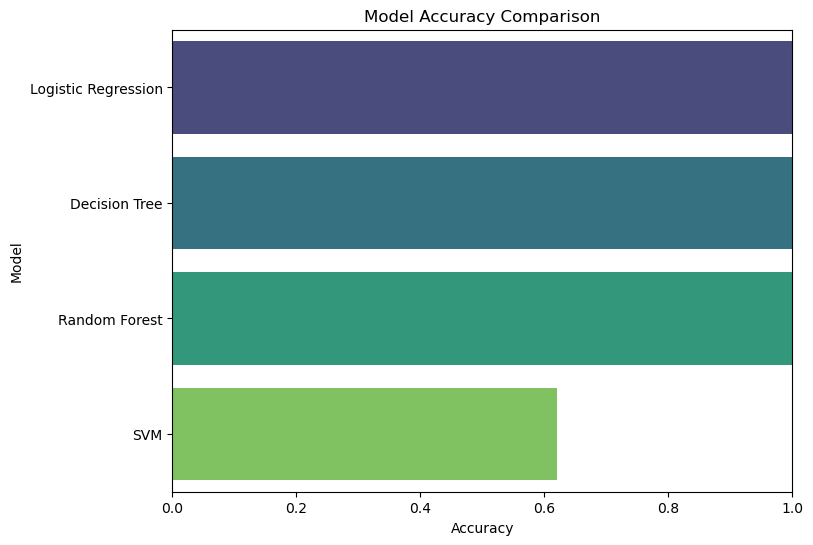

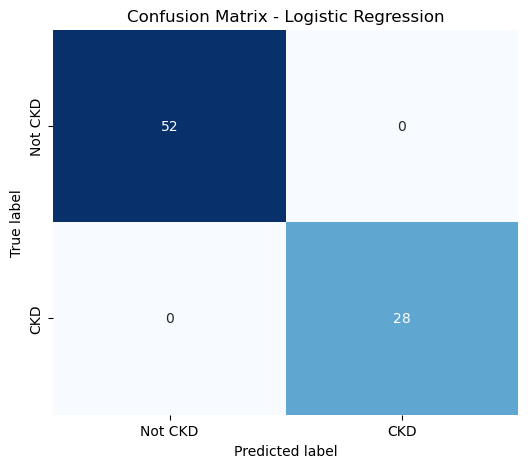

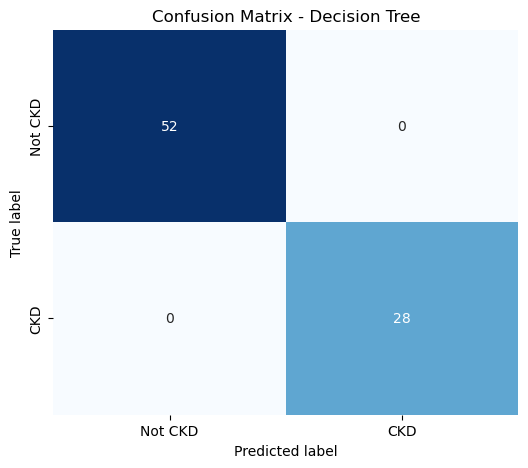

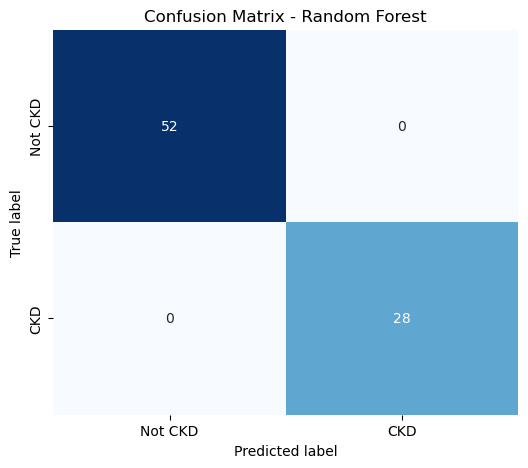

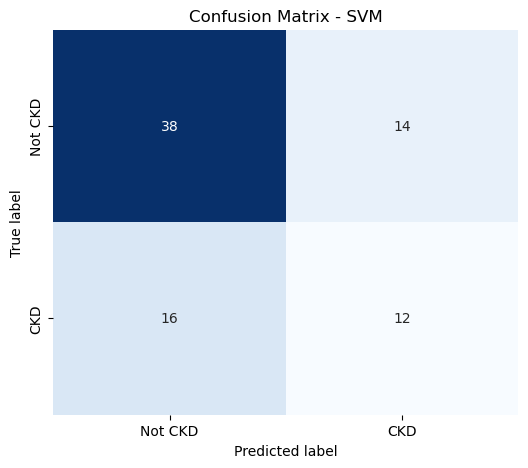

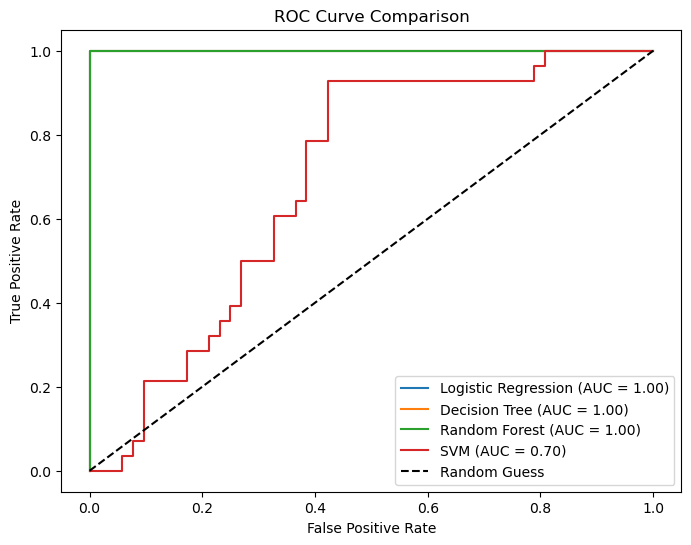

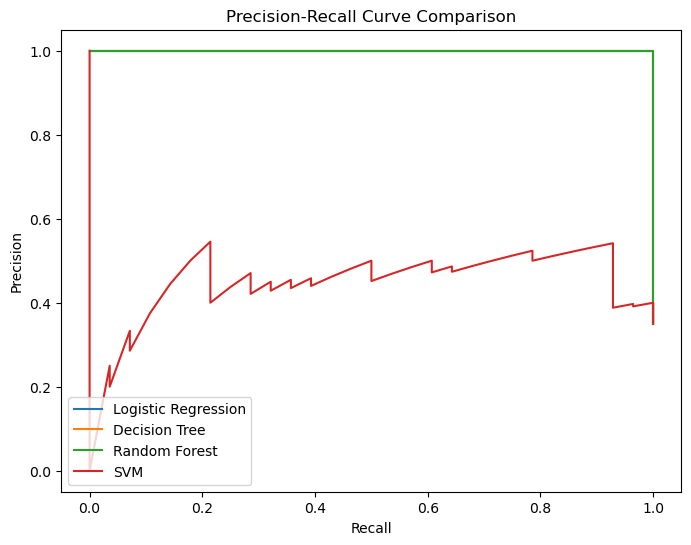

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Models and their results 
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
accuracies = [1.00, 1.00, 1.00, 0.62]  
confusion_matrices = {
    "Logistic Regression": confusion_matrix(y_test, LogisticRegression(random_state=42).fit(X_train, y_train).predict(X_test)),
    "Decision Tree": confusion_matrix(y_test, DecisionTreeClassifier(random_state=42).fit(X_train, y_train).predict(X_test)),
    "Random Forest": confusion_matrix(y_test, RandomForestClassifier(random_state=42).fit(X_train, y_train).predict(X_test)),
    "SVM": confusion_matrix(y_test, SVC(probability=True, random_state=42).fit(X_train, y_train).predict(X_test)),
}



# Accuracy  horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracies, y=model_names, palette='viridis', orient='h')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

#  Confusion Matrix Heatmap
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#  ROC Curve plotting for all models
plt.figure(figsize=(8, 6))
for model_name in model_names:
    model = None
    if model_name == "Logistic Regression":
        model = LogisticRegression(random_state=42)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=42)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    elif model_name == "SVM":
        model = SVC(probability=True, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve plotting for all models
plt.figure(figsize=(8, 6))
for model_name in model_names:
    model = None
    if model_name == "Logistic Regression":
        model = LogisticRegression(random_state=42)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=42)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    elif model_name == "SVM":
        model = SVC(probability=True, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


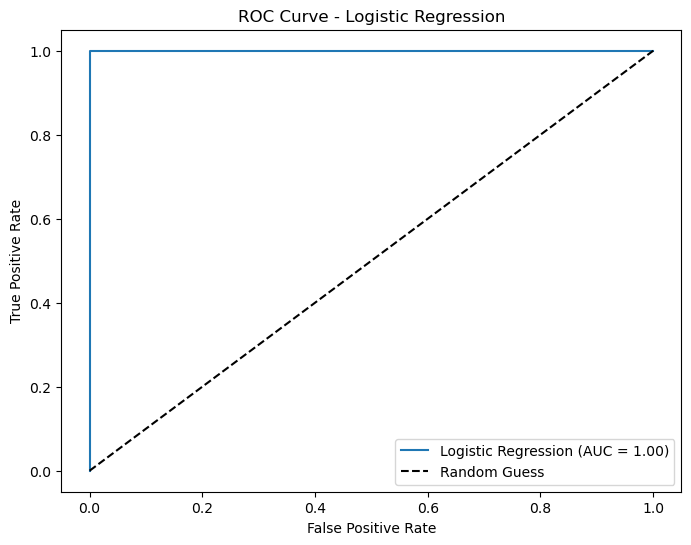

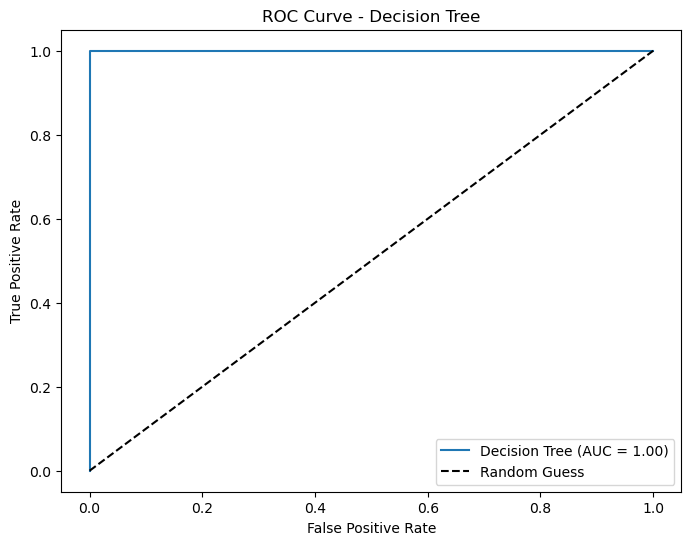

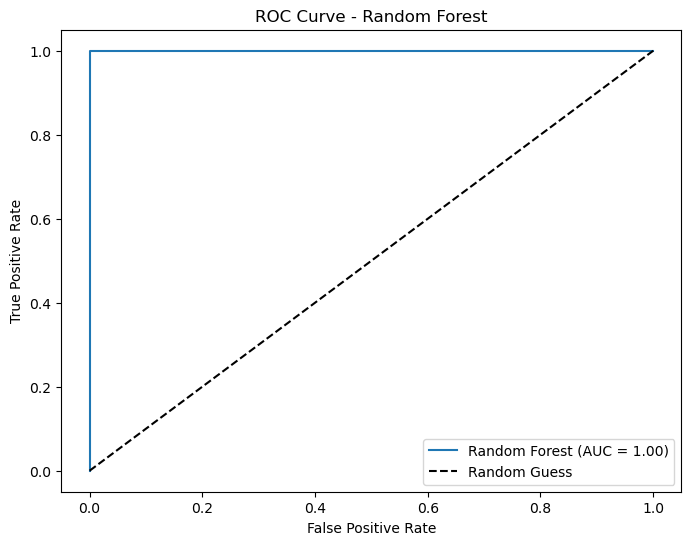

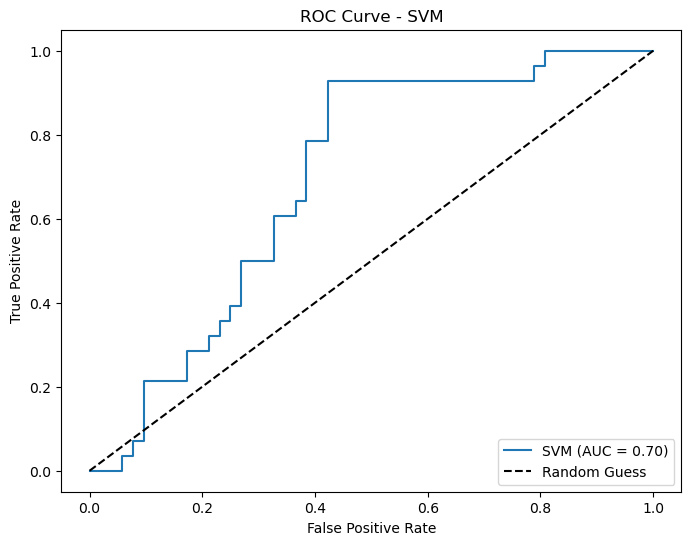

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


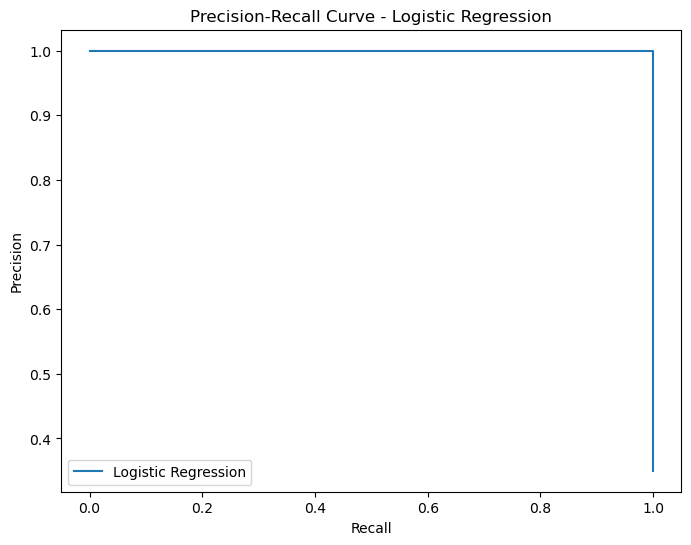

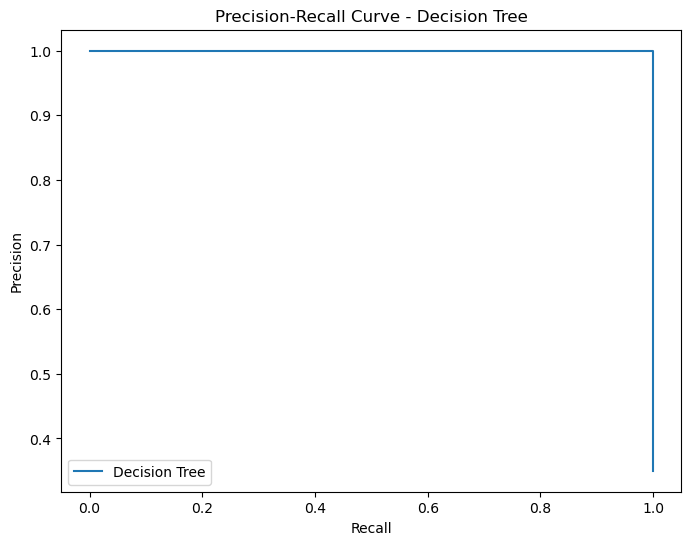

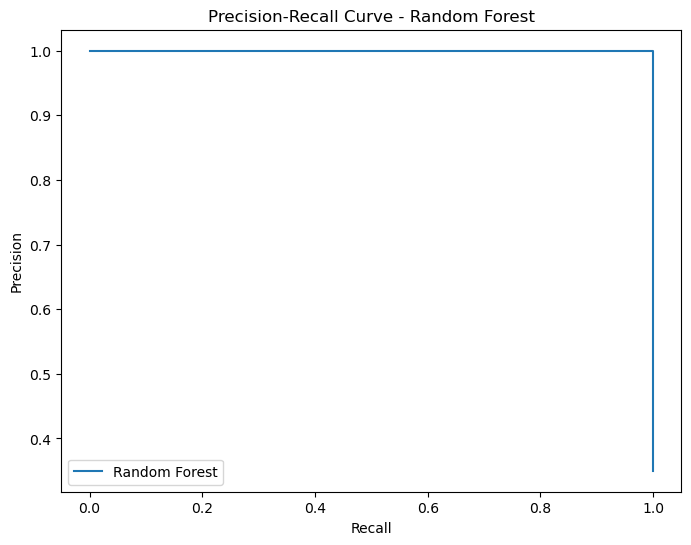

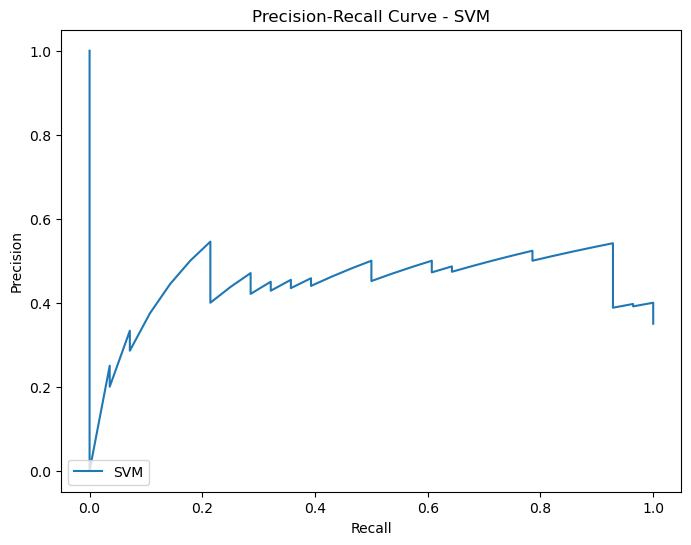

In [4]:
#  ROC Curve - Separate plots for each model
for model_name in model_names:
    plt.figure(figsize=(8, 6))
    
    # Initialize the model based on the model name
    model = None
    if model_name == "Logistic Regression":
        model = LogisticRegression(random_state=42)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=42)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    elif model_name == "SVM":
        model = SVC(probability=True, random_state=42)
    
    # Fit the model and calculate ROC
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    
    # Customize the plot
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

#  Precision-Recall Curve 
for model_name in model_names:
    plt.figure(figsize=(8, 6))
    
    # Initialize the model based on the model name
    model = None
    if model_name == "Logistic Regression":
        model = LogisticRegression(random_state=42)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=42)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    elif model_name == "SVM":
        model = SVC(probability=True, random_state=42)
    
    # Fit the model and calculate Precision-Recall
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f'{model_name}')
    
    # Customize the plot
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()


In [4]:
#Checking for Multicollinearity Using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant for intercept term
X_train_vif = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Display the VIF for each feature
print(vif_data)


                    Feature         VIF
0                     const  152.242327
1                       Age    1.334693
2            Blood Pressure    1.203781
3          Specific Gravity    1.727884
4                   Albumin    2.300918
5                     Sugar    1.975049
6      Blood Glucose Random    2.169941
7                Blood Urea    2.725986
8          Serum Creatinine    3.743214
9                    Sodium    2.742556
10                Potassium    1.411211
11               Hemoglobin    4.028243
12       Packed Cell Volume    3.990659
13   White Blood Cell Count    1.207363
14     Red Blood Cell Count    1.918183
15             Hypertension    2.407724
16        Diabetes Mellitus    2.485148
17  Coronary Artery Disease    1.331175
18                 Appetite    1.563976
19              Pedal Edema    1.686106
20                   Anemia    1.597811
21   Red Blood Cells_normal    1.350904
22          Pus Cell_normal    2.145712
23  Pus Cell Clumps_present    1.582642


In [5]:
# Hyperparameter Tuning for Logistic Regression using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__max_iter': [100, 200, 300]
}

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Create a pipeline that first scales the data, then applies Logistic Regression
pipeline_lr = make_pipeline(StandardScaler(), lr_model)

# Perform GridSearchCV
grid_search_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_lr.best_score_}")


#2. Decision Tree Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best score for Decision Tree: {grid_search_dt.best_score_}")

#3. Random Forest Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")

#4. Support Vector Machine (SVM) Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']  
}

# Initialize SVM model
svm_model = SVC(random_state=42)

# Perform GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best score for SVM: {grid_search_svm.best_score_}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Logistic Regression: {'logisticregression__C': 0.01, 'logisticregression__max_iter': 100, 'logisticregression__solver': 'saga'}
Best score for Logistic Regression: 0.9875
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score for Decision Tree: 0.9561805678010934
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 0.9874507729383413
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVM: 0.9812202433433258


In [6]:
# List of models and their best parameters
models = {
    "Logistic Regression": LogisticRegression(C=0.01, max_iter=100, solver='liblinear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42),
    "SVM": SVC(C=1, gamma='scale', kernel='linear', random_state=42)
}

# Evaluate each model
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.90      1.00      0.95        28

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Confusion Matrix:
[[49  3]
 [ 0 28]]

--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[52  0]
 [ 0 28]]

--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       

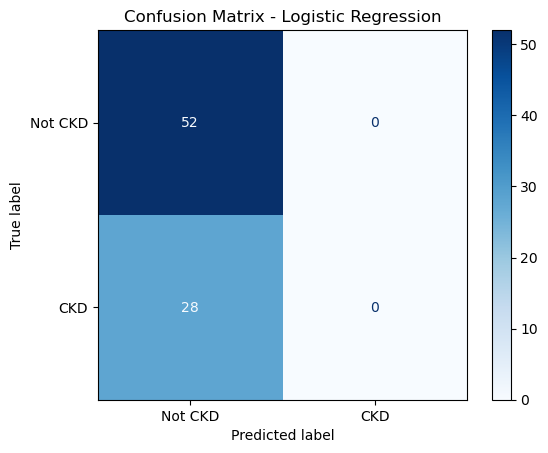

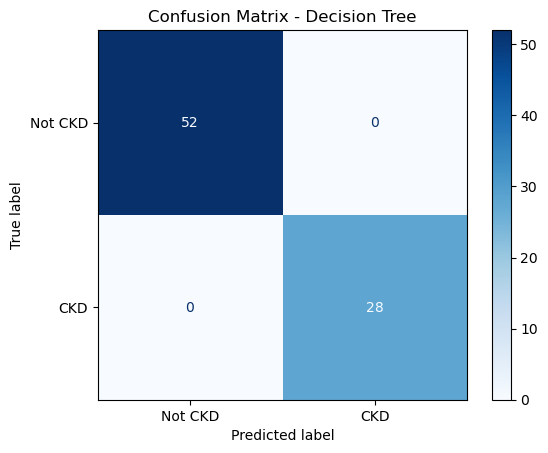

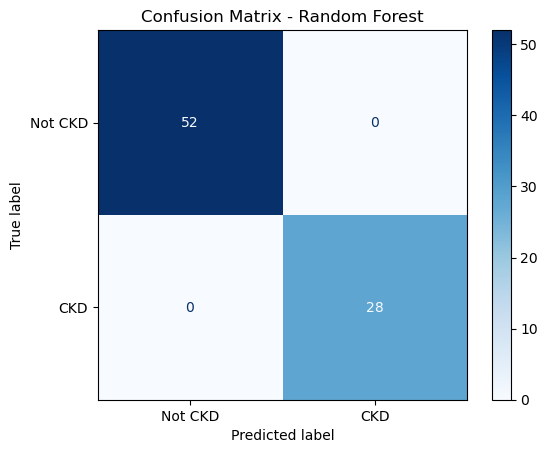

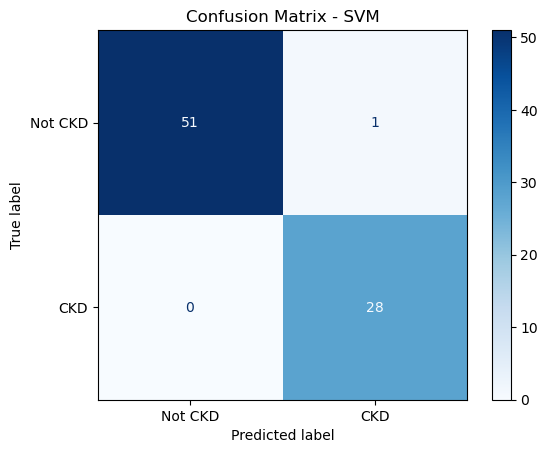

In [7]:
#Confusion Matrix Plots:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# List of models and their corresponding names
models = {
    "Logistic Regression": LogisticRegression(C=0.01, max_iter=100, solver='saga', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42),
    "SVM": SVC(C=1, gamma='scale', kernel='linear', random_state=42)
}

# Fit each model and plot the confusion matrix
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not CKD', 'CKD'])
    
    # Plot
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


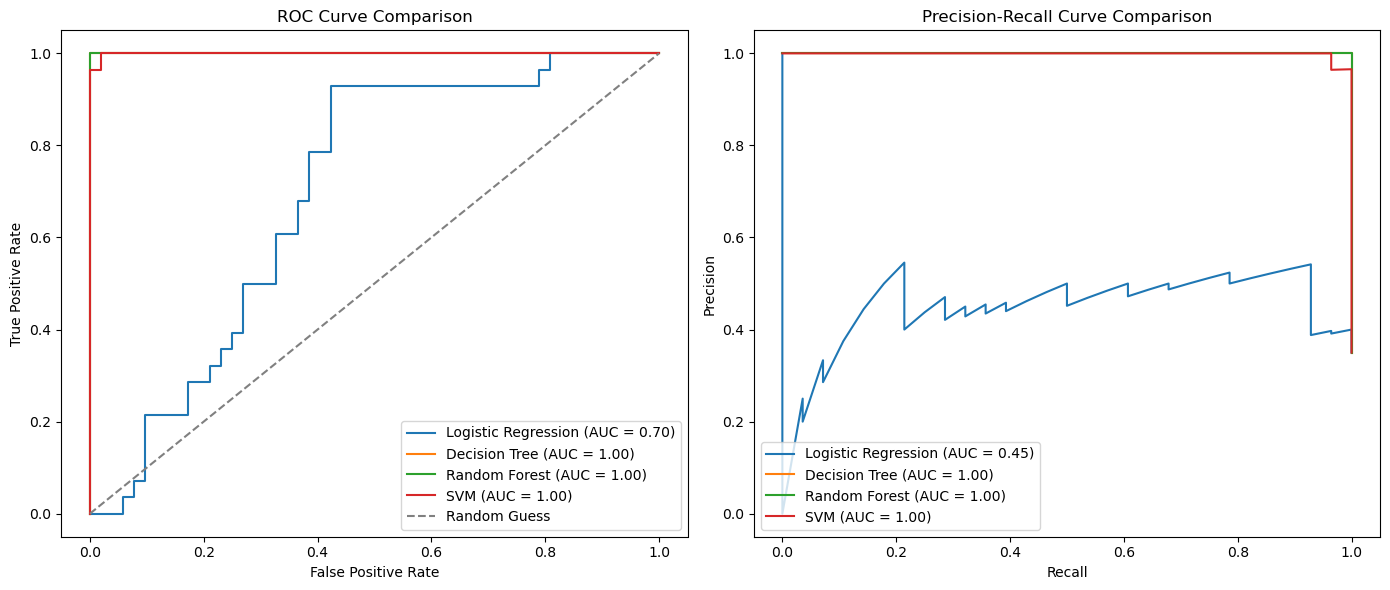

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(C=0.01, max_iter=100, solver='saga', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42),
    "SVM": SVC(C=1, gamma='scale', kernel='linear', random_state=42, probability=True) 
}

# Set up the plot
plt.figure(figsize=(14, 6))

# Initialize variables to hold the data for plotting
fpr = {}
tpr = {}
roc_auc = {}
precision = {}
recall = {}
pr_auc = {}

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  

    # Compute ROC curve and AUC
    fpr[model_name], tpr[model_name], _ = roc_curve(y_test, y_prob)
    roc_auc[model_name] = auc(fpr[model_name], tpr[model_name])

    # Compute Precision-Recall curve and AUC
    precision[model_name], recall[model_name], _ = precision_recall_curve(y_test, y_prob)
    pr_auc[model_name] = auc(recall[model_name], precision[model_name])

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr[model_name], tpr[model_name], label=f'{model_name} (AUC = {roc_auc[model_name]:.2f})')

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall[model_name], precision[model_name], label=f'{model_name} (AUC = {pr_auc[model_name]:.2f})')

# Finalizing the ROC plot
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# Finalizing the Precision-Recall plot
plt.subplot(1, 2, 2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


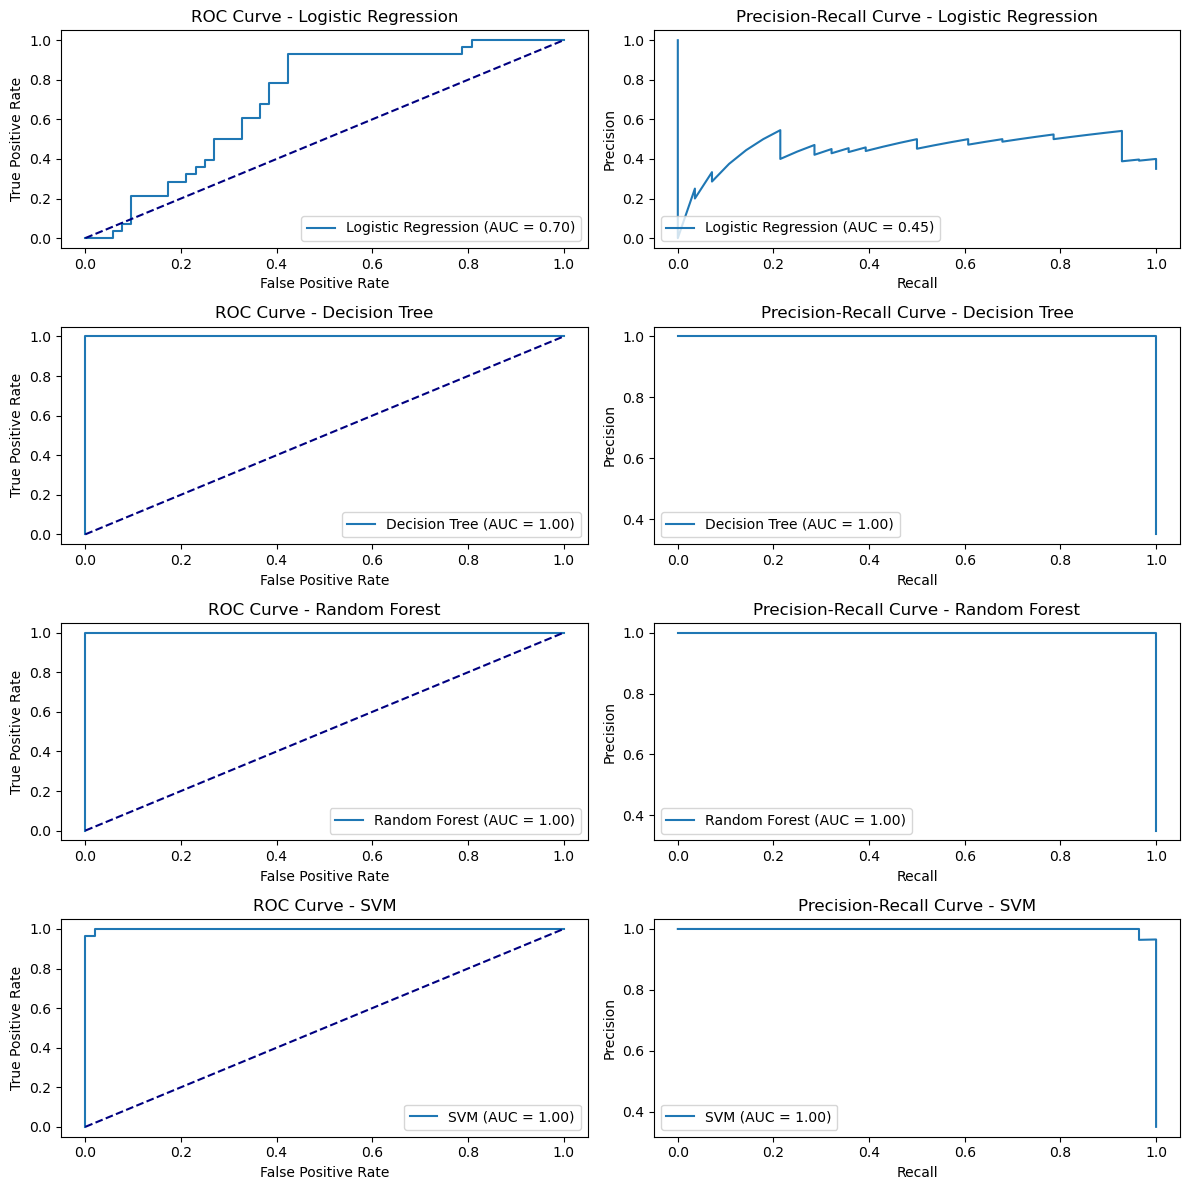

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# List of models and their corresponding names
models = {
    "Logistic Regression": LogisticRegression(C=0.01, max_iter=100, solver='saga', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42),
    "SVM": SVC(C=1, gamma='scale', kernel='linear', random_state=42, probability=True)
}

# Create a figure with subplots for ROC and Precision-Recall curves
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Iterate through models for ROC and Precision-Recall curves
for i, (model_name, model) in enumerate(models.items()):
    ax_roc = axes[i, 0]  
    ax_prc = axes[i, 1]  
    
    model.fit(X_train, y_train)
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]  
    else:
        y_pred_prob = model.decision_function(X_test)  
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    ax_roc.plot([0, 1], [0, 1], color='navy', linestyle='--')  
    ax_roc.set_title(f'ROC Curve - {model_name}')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.legend(loc='lower right')
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax_prc.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
    ax_prc.set_title(f'Precision-Recall Curve - {model_name}')
    ax_prc.set_xlabel('Recall')
    ax_prc.set_ylabel('Precision')
    ax_prc.legend(loc='lower left')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


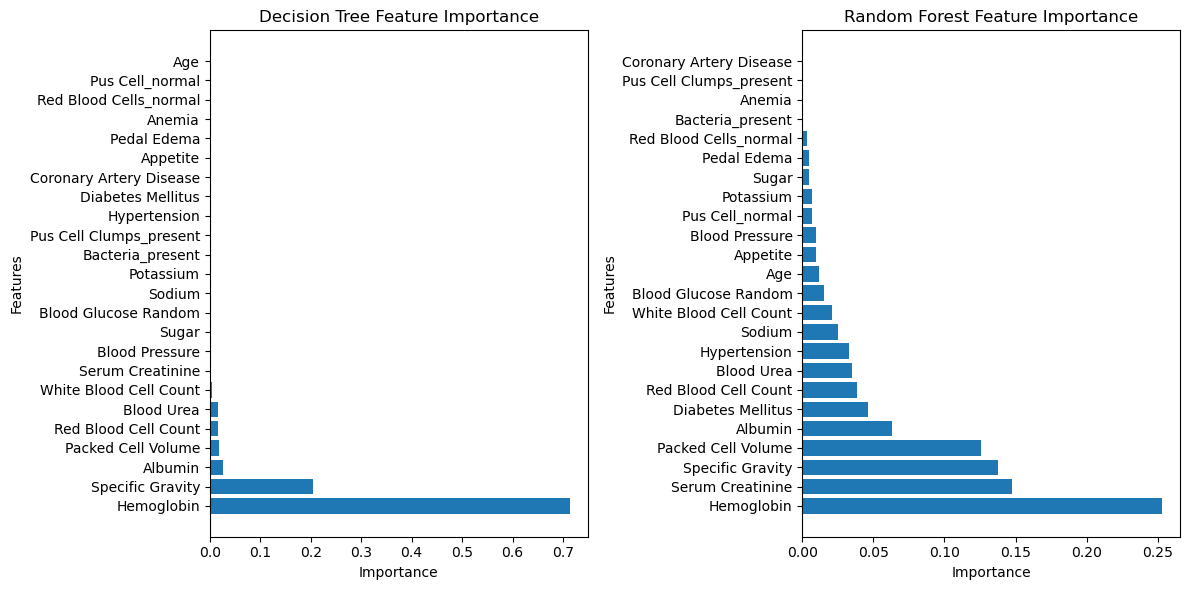

In [9]:
# Feature Importance (for Decision Tree and Random Forest):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importance for Decision Tree and Random Forest
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42)
}

# Fit models and get feature importances
feature_names = X_train.columns
plt.figure(figsize=(12, 6))

for i, (model_name, model) in enumerate(models.items(), start=1):
    model.fit(X_train, y_train)
    feature_importances = model.feature_importances_

    # Plot feature importances
    plt.subplot(1, 2, i)
    indices = np.argsort(feature_importances)[::-1]
    plt.barh(range(len(feature_importances)), feature_importances[indices], align="center")
    plt.yticks(range(len(feature_importances)), feature_names[indices])
    plt.title(f'{model_name} Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')

plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


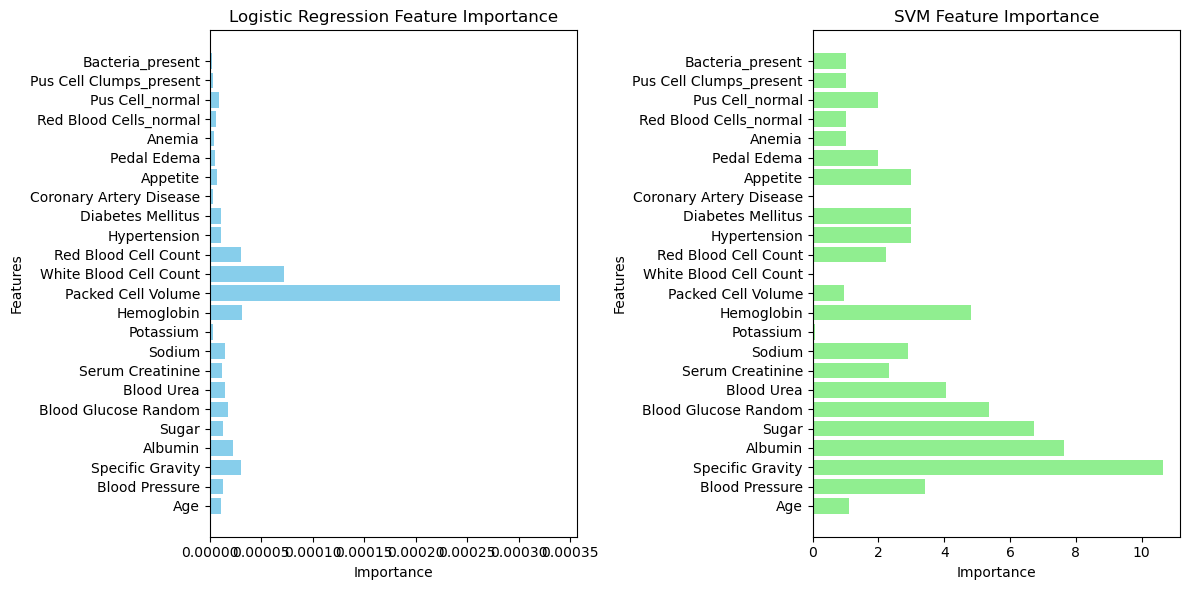

In [20]:
# Feature importance for Logistic Regression (using coefficients) and SVM (using feature weights from the trained models)

# Initialize the figure for the plots
plt.figure(figsize=(12, 6))

# Logistic Regression feature importance (using coefficients)
lr_model = LogisticRegression(C=0.01, max_iter=100, solver='saga', random_state=42)
lr_model.fit(X_train, y_train)
lr_feature_importance = abs(lr_model.coef_[0])
plt.subplot(1, 2, 1)
plt.barh(X_train.columns, lr_feature_importance, color='skyblue')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# SVM feature importance (using coefficients for linear SVM)
svm_model = SVC(C=1, gamma='scale', kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_feature_importance = abs(svm_model.coef_[0])
plt.subplot(1, 2, 2)
plt.barh(X_train.columns, svm_feature_importance, color='lightgreen')
plt.title('SVM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


In [10]:


#Performance Evaluation on Unseen Data (Testing on Test Set)

#Cross-validation Performance:
from sklearn.model_selection import cross_val_score
import numpy as np

# To Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# List of models
models = {
    "Logistic Regression": LogisticRegression(C=0.01, max_iter=100, solver='saga', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42),
    "SVM": SVC(C=1, gamma='scale', kernel='linear', random_state=42, probability=True)
}
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

cv_score = cross_val_score(model, X_train_sample, y_train_sample, cv=3, scoring='accuracy', n_jobs=-1)

cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

# Perform cross-validation and store the results
cv_results = {}
for model_name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = cv_score

# Display cross-validation results
for model_name, cv_score in cv_results.items():
    print(f"{model_name}: Mean CV Score = {np.mean(cv_score):.4f}, Std Dev = {np.std(cv_score):.4f}")


Logistic Regression: Mean CV Score = 0.6188, Std Dev = 0.0027
Decision Tree: Mean CV Score = 0.9562, Std Dev = 0.0194
Random Forest: Mean CV Score = 0.9875, Std Dev = 0.0118
SVM: Mean CV Score = 0.9812, Std Dev = 0.0077


In [11]:
#Comparing models using multiple metrics:

from sklearn.metrics import classification_report, roc_auc_score

# Dictionary to store model comparison metrics
model_comparison = {}

# Evaluate each model on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification report for precision, recall, f1-score
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # ROC AUC score for additional model evaluation
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    model_comparison[model_name] = {
        "Classification Report": class_report,
        "ROC AUC": roc_auc
    }

# Display comparison metrics
for model_name, metrics in model_comparison.items():
    print(f"\n{model_name} - ROC AUC: {metrics['ROC AUC']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])



Logistic Regression - ROC AUC: 0.6957
Classification Report:
{'0': {'precision': 0.65, 'recall': 1.0, 'f1-score': 0.7878787878787878, 'support': 52.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 28.0}, 'accuracy': 0.65, 'macro avg': {'precision': 0.325, 'recall': 0.5, 'f1-score': 0.3939393939393939, 'support': 80.0}, 'weighted avg': {'precision': 0.42250000000000004, 'recall': 0.65, 'f1-score': 0.5121212121212121, 'support': 80.0}}

Decision Tree - ROC AUC: 1.0000
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 52.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 28.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 80.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 80.0}}

Random Forest - ROC AUC: 1.0000
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 52.0}, '1': {'precision': 

In [12]:
#Feature Engineering for Further Improvement:

from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Interaction Terms: Create interaction terms between variables, especially if  non-linear relationships between them.
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (interaction terms)
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [15]:
# Finalizing and saving the Best Model:

import joblib

# Save the Random Forest model
joblib.dump(best_model, 'random_forest_model.pkl')

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [16]:
#Saving the Feature Importance:

import pandas as pd

# Get feature importance from Random Forest model
feature_importance = best_model.feature_importances_

# Create a DataFrame for feature importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Save the feature importance to a CSV file
feature_df.to_csv('random_forest_feature_importance.csv', index=False)

print("Feature importance saved successfully!")


Feature importance saved successfully!


In [18]:
# Loading the Model and Making Predictions

import joblib
import pandas as pd

# Load the saved Random Forest model
model = joblib.load('random_forest_model.pkl')


# New  DataFrame in the same format as the training data 
new_data = pd.DataFrame({
    'Age': [45],
    'Blood Pressure': [80],
    'Specific Gravity': [1.020],
    'Albumin': [1],
    'Sugar': [0],
    'Blood Glucose Random': [140],
    'Blood Urea': [23],
    'Serum Creatinine': [0.9],
    'Sodium': [140],
    'Potassium': [4.5],
    'Hemoglobin': [14.0],
    'Packed Cell Volume': [44],
    'White Blood Cell Count': [6500],
    'Red Blood Cell Count': [5.0],
    'Hypertension': [1],
    'Diabetes Mellitus': [1],
    'Coronary Artery Disease': [0],
    'Appetite': [1],
    'Pedal Edema': [0],
    'Anemia': [1],
    'Red Blood Cells_normal': [1],
    'Pus Cell_normal': [1],
    'Pus Cell Clumps_present': [0],
    'Bacteria_present': [1]
})

# Make a prediction
prediction = model.predict(new_data)
prediction_proba = model.predict_proba(new_data)  

# Print the prediction and probability
print("Predicted Class:", "CKD" if prediction[0] == 1 else "Not CKD")
print("Probability of CKD:", prediction_proba[0][1])


Predicted Class: Not CKD
Probability of CKD: 0.1629126984126984


In [19]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the model
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the client 
    data = request.get_json(force=True)
    
    # Create DataFrame
    input_data = pd.DataFrame(data, index=[0])
    
    # Make prediction
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)
    
    # Return prediction as JSON response
    return jsonify({
        'prediction': 'CKD' if prediction[0] == 1 else 'Not CKD',
        'probability': prediction_proba[0][1]
    })

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [ ]:
import requests

# Define the endpoint URL
url = 'http://127.0.0.1:5000/predict'

# Define the input data in JSON format
input_data = {
    'Age': 45,
    'Blood Pressure': 80,
    'Specific Gravity': 1.020,
    'Albumin': 1,
    'Sugar': 0,
    'Blood Glucose Random': 140,
    'Blood Urea': 23,
    'Serum Creatinine': 0.9,
    'Sodium': 140,
    'Potassium': 4.5,
    'Hemoglobin': 14.0,
    'Packed Cell Volume': 44,
    'White Blood Cell Count': 6500,
    'Red Blood Cell Count': 5.0,
    'Hypertension': 1,
    'Diabetes Mellitus': 1,
    'Coronary Artery Disease': 0,
    'Appetite': 1,
    'Pedal Edema': 0,
    'Anemia': 1,
    'Red Blood Cells_normal': 1,
    'Pus Cell_normal': 1,
    'Pus Cell Clumps_present': 0,
    'Bacteria_present': 1
}

# Send the POST request
response = requests.post(url, json=input_data)

# Print the response
print(response.json())
